In [1]:
# import matplotlib
# matplotlib.use('WXAgg')

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import pandas as pd

%matplotlib inline

# How FDR relates to the change of $r$, sensitivity $x$, and specificity $y$

Consider the probability of having a disease in the population is $r$, population size $N$, with simple calculation (refer to Figure 1 in http://rsos.royalsocietypublishing.org/content/1/3/140216)

\begin{align*}
FDR &= \frac{N(1-r)(1-y)}{N(1-r)(1-y) + Nrx} \\
    &= \frac{1}{1 + \frac{rx}{(1-r)(1-y)}}
\end{align*}

In [2]:
def fdr(rate, sensitivity, specificity):
    part = rate * sensitivity / ((1 - rate) * (1 - specificity))
    return 1 / (1 + part)

In [3]:
rate = 0.01
sens = 0.8
spec = 0.95

In [4]:
# Confirm the FDR calculation is the same to the one reported in Figure 1 of 
# http://rsos.royalsocietypublishing.org/content/1/3/140216.
assert '{0:.02f}'.format(fdr(rate, sens, spec)) == '0.86'

# 2D with specificity fixed

In [5]:
rate = 0.01
xs_sens = np.arange(0.01, 1.01, 0.01)
spec = 0.95

(0, 1)

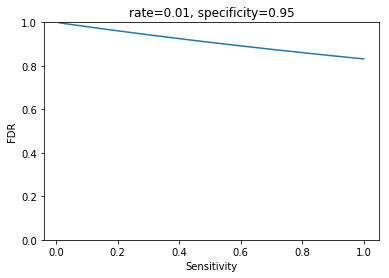

In [6]:
plt.plot(xs_sens, fdr(rate, xs_sens, spec))
plt.xlabel('Sensitivity')
plt.ylabel('FDR')
plt.title('rate={0:.2f}, specificity={1:.2f}'.format(rate, spec))
plt.ylim(0, 1)

In [7]:
fdr(rate, xs_sens, spec)[-1]

0.8319327731092439

Even when the sensitivity is 1, the FDR is still as low as 0.83.

# 3D surface

In [8]:
xs_sens = np.linspace(0.01, 0.99, 50)
ys_spec = np.linspace(0.01, 0.99, 50)
X, Y = np.meshgrid(xs_sens, ys_spec)
xs = X.ravel()
ys = Y.ravel()
zs = fdr(rate=0.1, sensitivity=xs_sens, specificity=ys_spec)

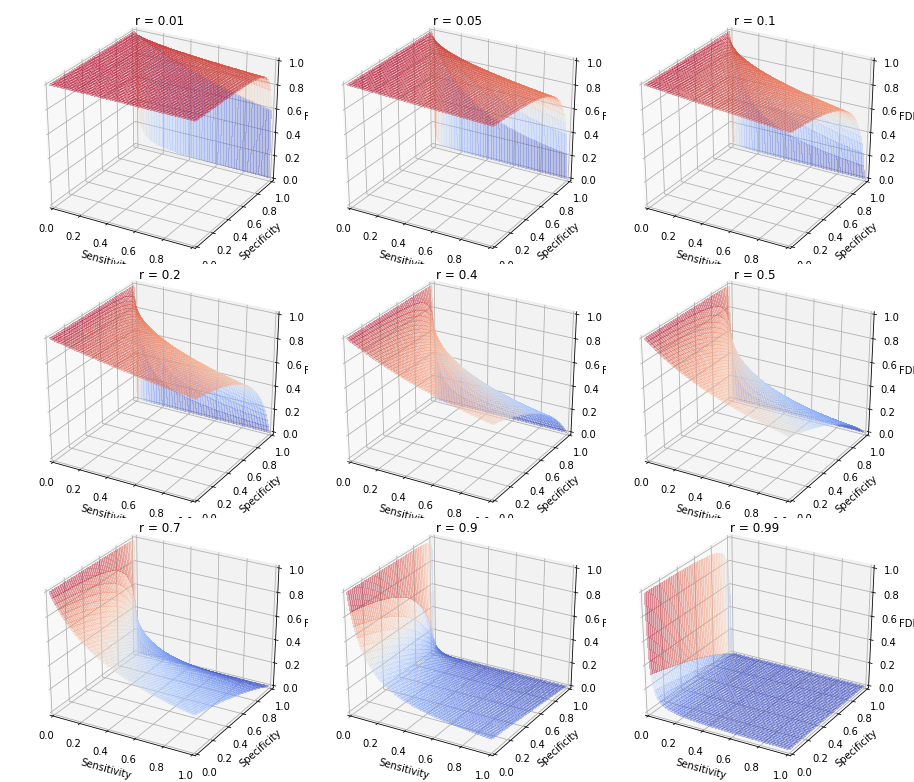

In [9]:
fig = plt.figure(figsize=(16, 14))
# ax = fig.gca(projection='3d')

for k, i in enumerate([0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 0.99]):
    r = i

    ax = fig.add_subplot(3, 3, k + 1, projection='3d')
    
    xs = np.linspace(0.0001, 0.9999, 200)
    ys = np.linspace(0.0001, 0.9999, 200)

    X, Y = np.meshgrid(xs, ys)
    Z = fdr(rate=r, sensitivity=X, specificity=Y)

    surf = ax.plot_surface(X, Y, Z,
#                            rstride=1, cstride=1,
                           cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.3)
    ax.set_xlabel('Sensitivity')
    ax.set_ylabel('Specificity')
    ax.set_zlabel('FDR')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    # Customize the view angle so it's easier to understand the plot.
#     ax.view_init(elev=10, azim=20)
    ax.set_title('r = {0}'.format(r))
plt.subplots_adjust(wspace=0, hspace=0)

Note:

1. When $r$ (prior probability) is low, meaning the occurence of it in the population is rare, then sensitivity and specificity need to be very high to a reasonable FDR. See the first figure that FDR keep being high (flat) in most of the area of the (sensitivity, specificity) combinations untill they are both close to 1 (a sharp drop).
1. On the other end, when $r$ is high, then the requirement of sensitivity and specificity wouldn't be as demanding to ensure a good FDR. See the plateau in most of the area but at a low FDR level.